In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

%run ./scripts/util_func.py

In [3]:
# import data to dataframe
# Data rate is 20 HZ

r = 0.3 # wheel radius (m)
B = 1.296 # wheel base (m)
A = 1.52 - r*2
m = 260
g = 9.8

dataframe = pd.read_csv("./data/doughnut_boreal/doughnut_data.csv", skiprows=[1])

print(dataframe)

       Unnamed: 0             ros_time  joy_switch  icp_index  cmd_left_vel  \
0               1                    0       False          0      0.000000   
1               2  1606767151233303379       False          1      0.000000   
2               3  1606767151233303379       False          1      0.000000   
3               4  1606767151284414274       False          2      0.000000   
4               5  1606767151334713976       False          2      0.000000   
...           ...                  ...         ...        ...           ...   
28610       28611  1606768581634582642       False      14288      3.266667   
28611       28612  1606768581685314785       False      14289      3.266667   
28612       28613  1606768581733615365       False      14289      3.266667   
28613       28614  1606768581786646445       False      14290      3.266667   
28614       28615  1606768581834961966       False      14290      3.266667   

       meas_left_vel  cmd_right_vel  meas_right_vel

In [4]:
# convert dataframe to numpy array

array = data.to_numpy()
array =np.delete(array,[0],axis=0)

time_arr = array[:,1]
time_arr = (time_arr - time_arr[0]) * 10**(-9)

joy_arr = array[:,2]
joy_arr = joy_arr == 'False'
print(joy_arr)

icp_index_arr = array[:,3]

left_vel_cmd_arr = array[:,4]
left_vel_meas_arr = array[:,5]
right_vel_cmd_arr = array[:,6]
right_vel_meas_arr = array[:,7]

icp_pos_x_arr = array[:,8]
icp_pos_y_arr = array[:,9]

icp_quat_x_arr = array[:,10]
icp_quat_y_arr = array[:,11]
icp_quat_z_arr = array[:,12]
icp_quat_w_arr = array[:,13]

# array = data.to_numpy()
# array =np.delete(array,[0],axis=0)

# time_arr = array[:,1]
# time_arr = (time_arr - time_arr[0]) * 10**(-9)

# # joy_arr = array[:,2]
# icp_index_arr = array[:,2]

# left_vel_cmd_arr = array[:,3]
# left_vel_meas_arr = array[:,4]
# right_vel_cmd_arr = array[:,5]
# right_vel_meas_arr = array[:,6]

# icp_pos_x_arr = array[:,7]
# icp_pos_y_arr = array[:,8]

# icp_quat_x_arr = array[:,9]
# icp_quat_y_arr = array[:,10]
# icp_quat_z_arr = array[:,11]
# icp_quat_w_arr = array[:,12]

print(icp_quat_x_arr)


[ True  True  True ...  True  True  True]
[-0.010211273830667436 -0.010245266115438231 -0.010245266115438231 ...
 0.004398746927108547 0.004398746927108547 0.005990018000146576]


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


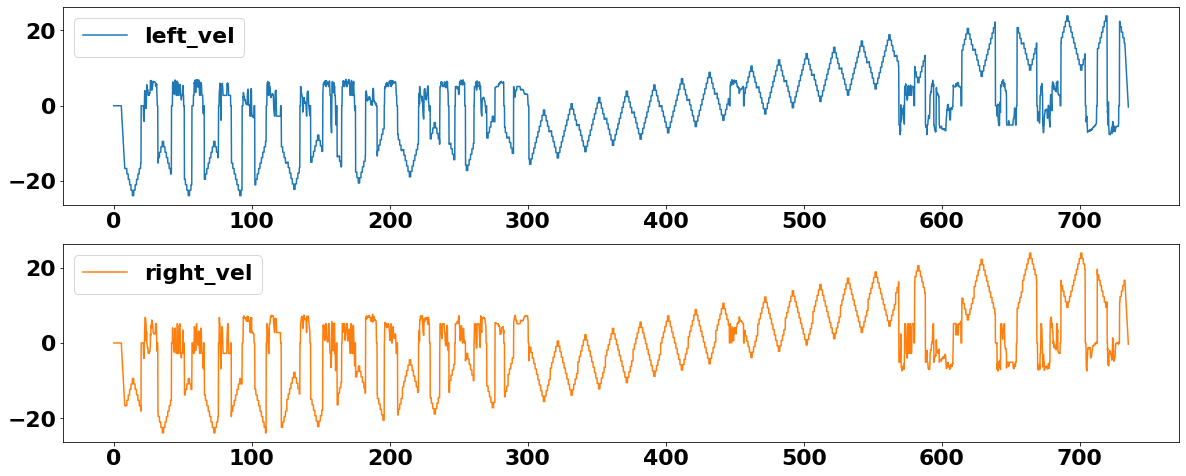

In [5]:
plt.figure(2, figsize=(20,8))
plt.subplot(211)
plt.plot(time_arr, left_vel_cmd_arr, c='tab:blue', label='left_vel')
plt.legend()
plt.subplot(212)
plt.plot(time_arr, right_vel_cmd_arr, c='tab:orange', label='right_vel')
plt.legend()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


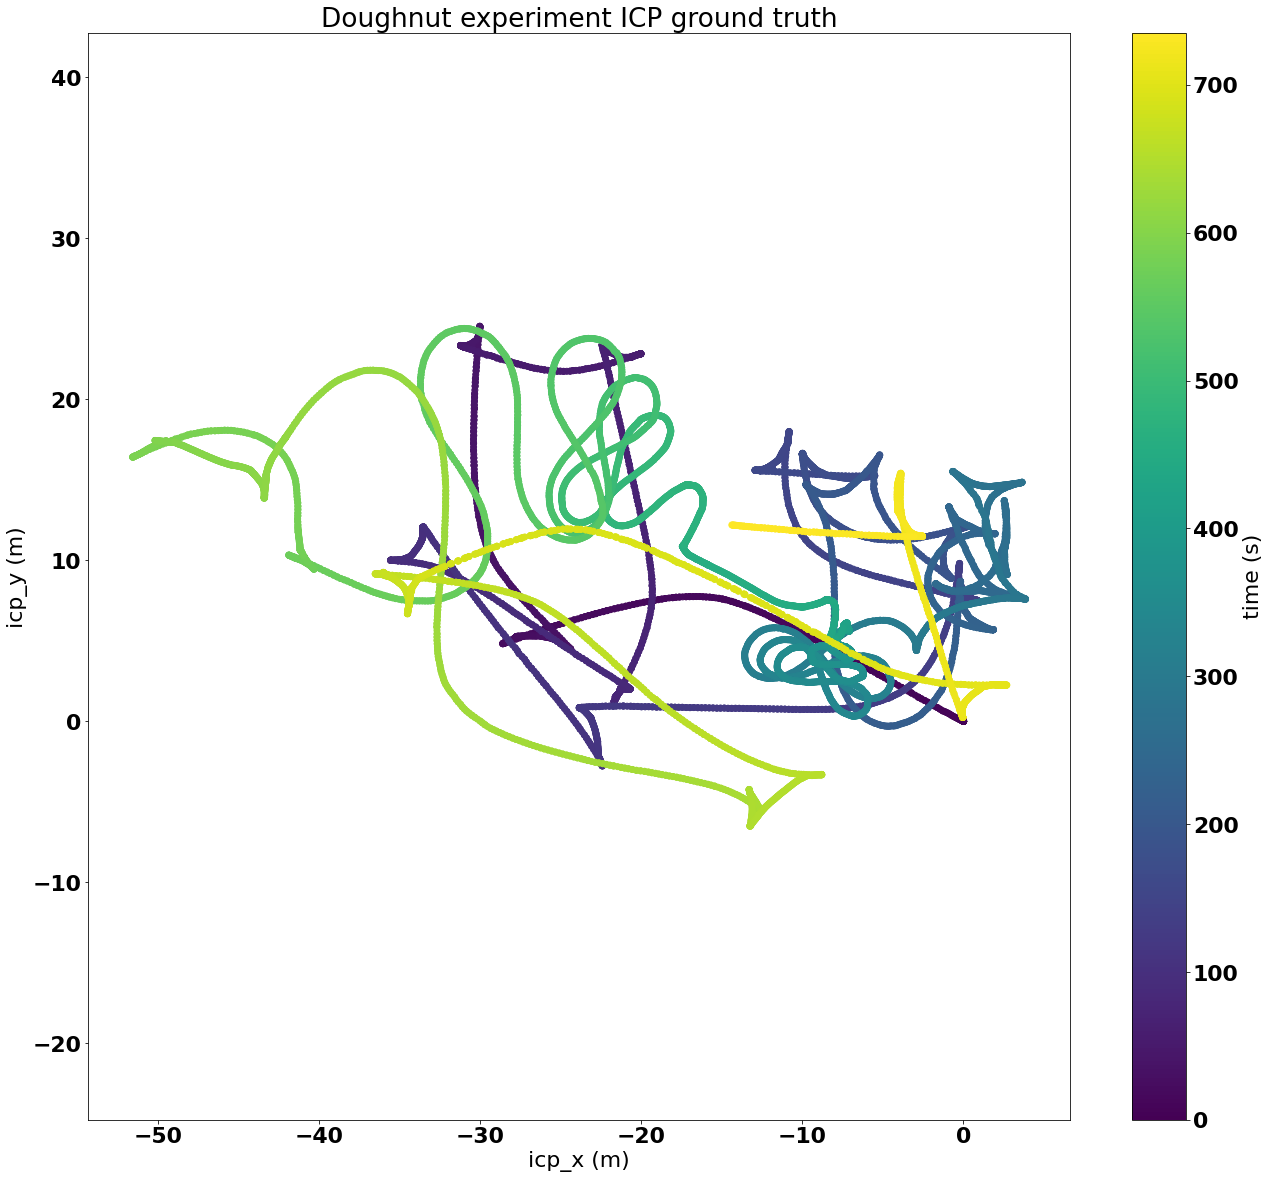

In [6]:
fig = plt.figure(2, figsize = (22,20))
icp = plt.scatter(icp_pos_x_arr, icp_pos_y_arr, c = time_arr)
cb = plt.colorbar(icp)
cb.set_label('time (s)')
plt.axis('equal')
plt.title('Doughnut experiment ICP ground truth')
plt.xlabel('icp_x (m)')
plt.ylabel('icp_y (m)')

fig.savefig('./figs/icp_traj.png')

plt.show()

In [7]:
# Compute Euler Yaw from ICP quaternion

# quat = np.zeros((icp_z_arr.shape[0], 4))
# icp_yaw_arr = np.zeros((icp_z_arr.shape[0], 1))

# for i in range(icp_z_arr.shape[0]):
#     quat[i, 2] = icp_z_arr[i]
#     quat[i, 3] = icp_w_arr[i]
    
#     s_yaw = 2 * np.arcsin(quat[i, 2])
#     c_yaw = 2 * np.arccos(quat[i,3])
#     icp_yaw_arr[i] = np.arctan(s_yaw / c_yaw)
# #     icp_yaw_arr[i] = np.arctan2(np.arcsin2()
    
icp_quat_arr = np.column_stack((icp_quat_x_arr, icp_quat_y_arr, 
                               icp_quat_z_arr, icp_quat_w_arr))    

icp_euler_arr = np.zeros((icp_quat_arr.shape[0], 3))

for i in range(icp_quat_arr.shape[0]):
    icp_euler_arr[i,0], icp_euler_arr[i,1], icp_euler_arr[i,2] = quaternion_to_euler(icp_quat_arr[i,3], icp_quat_arr[i,0], icp_quat_arr[i,1], icp_quat_arr[i,2])

    
print(icp_euler_arr)

[[-1.60204604e-02 -2.09411705e-02 -4.66119084e-01]
 [-1.61008081e-02 -2.08961366e-02 -4.66144757e-01]
 [-1.61008081e-02 -2.08961366e-02 -4.66144757e-01]
 ...
 [ 6.43861754e-04 -8.77665788e-03  3.04486537e+00]
 [ 6.43861754e-04 -8.77665788e-03  3.04486537e+00]
 [-7.36205086e-04 -1.20294268e-02  3.04538152e+00]]


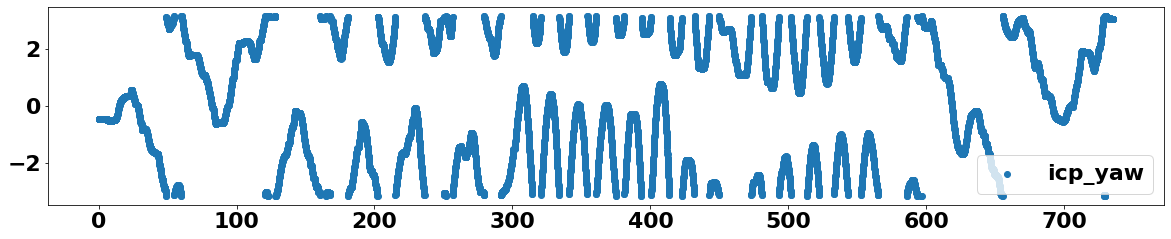

In [8]:
plt.figure(2, figsize=(20,8))
plt.subplot(211)
plt.scatter(time_arr, icp_euler_arr[:,2], c='tab:blue', label='icp_yaw')
plt.legend()

In [9]:
# Built state and input vectors

icp_states = np.column_stack((time_arr, icp_index_arr, icp_pos_x_arr, icp_pos_y_arr, icp_euler_arr[:,2]))

# print(icp_euler_arr[:,2])
# print(icp_states)

wheel_vels = np.column_stack((time_arr, icp_index_arr, left_vel_cmd_arr, right_vel_cmd_arr))

print(wheel_vels)

wheel_vels_meas = np.column_stack((time_arr, icp_index_arr, left_vel_meas_arr, right_vel_meas_arr))

print(wheel_vels_meas)

[[0.0 19.0 0.0 0.0]
 [0.050337280000000005 20.0 0.0 0.0]
 [0.100604672 20.0 0.0 0.0]
 ...
 [735.253571328 7372.0 0.3333333333333664 0.3333333333333664]
 [735.303886336 7372.0 3.3029134982598413e-14 3.3029134982598413e-14]
 [735.3491668480001 7373.0 -0.33333333333330034 -0.33333333333330034]]
[[0.0 19.0 0.0 0.0]
 [0.050337280000000005 20.0 0.0 0.0]
 [0.100604672 20.0 0.0 0.0]
 ...
 [735.253571328 7372.0 1.8675022996339323 1.3089969389957472]
 [735.303886336 7372.0 1.8675022996339323 1.3089969389957472]
 [735.3491668480001 7373.0 1.8675022996339323 1.3089969389957472]]


In [14]:
# export data

np.save('data/icp_states_tracks_LS.npy', icp_states)
np.save('data/wheel_vels_tracks_LS.npy', wheel_vels)
np.save('data/wheel_vels_meas_tracks_LS.npy', wheel_vels_meas)


In [15]:
# compute distance traveled

dist_icp = 0

for i in range(time_arr.shape[0] - 1):
    
    dist_icp = dist_icp + comp_disp(icp_states[i+1, 2:], icp_states[i, 2:])
    
print('Distance traveled : ', dist_icp, 'm.')

Distance traveled :  1141.0500619754407 m.


In [16]:
# filter joy switch

arr_tot = np.column_stack((icp_states, wheel_vels, wheel_vels_meas))

# bool_mask = np.zeros((arr_tot.shape), dtype=bool)

# for i in range(arr_tot.shape[0]):
#     if arr_tot[i,0]:
#         bool_mask[i,:] = True
#     else:
#         bool_mask[i,:] = False

# print(arr_tot[bool_mask])
arr_tot_no_joy = arr_tot[joy_arr, :]
print(arr_tot_no_joy[0, 9:])


[0.0 19.0 0.0 0.0]


In [17]:
np.save('data/icp_states_nojoy_tracks_LS.npy', arr_tot_no_joy[:, :5])
np.save('data/wheel_vels_nojoy_tracks_LS.npy', arr_tot_no_joy[:, 5:9])
np.save('data/wheel_vels_meas_nojoy_tracks_LS.npy', arr_tot_no_joy[:, 9:])

In [18]:
# create powertrain dynamics wheel velocity estimates

tau_c = 0.35
tau_d = 0.1

pwrtrn_vels = np.zeros(arr_tot_no_joy[:, 5:9].shape)

pwrtrn_vels[:,:2] = arr_tot_no_joy[:, 5:7]

for i in range(1, pwrtrn_vels.shape[0]-1):
    dt = wheel_vels[i,0] - wheel_vels[i-1,0]
    pwrtrn_vels[i+1,2] = powerTrain_vel(tau_c, tau_d, arr_tot_no_joy[:, 7], pwrtrn_vels[:,2], i, dt)
    pwrtrn_vels[i+1,3] = powerTrain_vel(tau_c, tau_d, arr_tot_no_joy[:, 8], pwrtrn_vels[:,3], i, dt)

print(pwrtrn_vels)
print(wheel_vels)

np.save('data/wheel_vels_pwrtrn_nojoy_tracks_LS.npy', pwrtrn_vels)

[[0.00000000e+00 1.90000000e+01 0.00000000e+00 0.00000000e+00]
 [5.03372800e-02 2.00000000e+01 0.00000000e+00 0.00000000e+00]
 [1.00604672e-01 2.00000000e+01 0.00000000e+00 0.00000000e+00]
 ...
 [7.35253571e+02 7.37200000e+03 3.36308234e+00 3.36308234e+00]
 [7.35303886e+02 7.37200000e+03 3.02341207e+00 3.02341207e+00]
 [7.35349167e+02 7.37300000e+03 2.68460097e+00 2.68460097e+00]]
[[0.0 19.0 0.0 0.0]
 [0.050337280000000005 20.0 0.0 0.0]
 [0.100604672 20.0 0.0 0.0]
 ...
 [735.253571328 7372.0 0.3333333333333664 0.3333333333333664]
 [735.303886336 7372.0 3.3029134982598413e-14 3.3029134982598413e-14]
 [735.3491668480001 7373.0 -0.33333333333330034 -0.33333333333330034]]


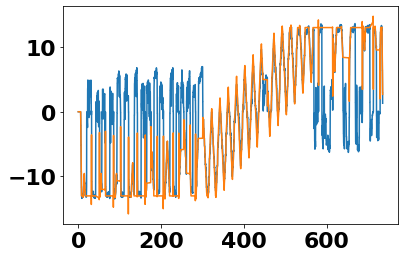

In [19]:
plt.plot(wheel_vels[:,0], wheel_vels_meas[:,3])
plt.plot(pwrtrn_vels[:,0], pwrtrn_vels[:,3])